# Linear Regression and Gradient Descent

In this lab, the goal was to understand the optimization process by coding it step by step and analyzing how different conditions affect training. 
I experimented with learning rates, training durations, and dimensionalities to gain insights into the behavior of the algorithm.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

## 1. Generating Sunthetic Data

Created a sunthetic dataset with a known linear relationship y=2x+5+ϵ where ϵ represents random Gaussian noise.

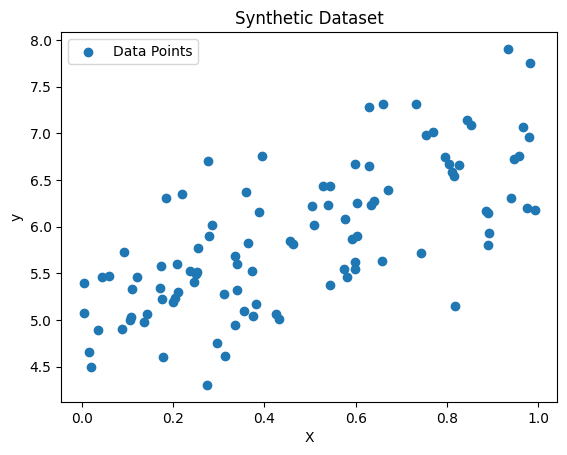

In [2]:
np.random.seed(100)

X = np.random.rand(100, 1) 
y = 2 * X.squeeze() + 5 + np.random.randn(100) * 0.5  # y = 2x + 5 + noise

plt.scatter(X, y, label="Data Points")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Dataset")
plt.legend()
plt.show()


## 2. Preparing the Data

To include the bias term in the weight vector, I added a column of ones to the feature matrix X. 
This allows the bias and feature weight to be represented in a single vector, simplifying the implementation.

In [3]:
X_bias = np.c_[np.ones((100, 1)), X]

## 3. Initializing Parameters

Initialized the weight vector with zeros. Since there is one feature plus the bias term, the weight vector has shape (2,),
where the first element represents the bias and the second represents the feature weight.

In [4]:
w = np.zeros(2)

## 4. Implementing Gradient Descent

Implemented gradient descent by computing the gradient using the formula provided in the introduction and updating the weights accordingly.

In [5]:
def mse(X, y, w):
    y_pred = np.dot(X, w)
    loss = np.mean(((y_pred - y) ** 2))
    return loss


print(mse(X_bias, y, w))

35.06097924622436


In [ ]:
def compute_gradient(X, y, w):
    y_pred = np.dot(X, w)
    gradient = (2 / len(y)) * np.dot(X.T, (y_pred - y))
    return gradient


compute_gradient(X_bias, y, w)

array([-11.74426172,  -5.85917755])

## 5. Running the Training Loop

Combined all previous steps into a training loop that iteratively updated the weights. During training, I tracked the values of the loss function to monitor convergence.

In [7]:
def gradient_descent(X, y, learning_rate=10e-5, epochs=1000, dim=2):
    w = np.zeros((dim))
    loss_history = []
    w_history = []
    for epoch in range(epochs):
        gradient = compute_gradient(X, y, w)
        w -= learning_rate * gradient
        loss = mse(X, y, w)
        loss_history.append(loss)
        w_history.append(w.copy())
    return w, loss_history, w_history

## 6. Checking the Results

After training, I compared the learned weights with the true ones. I also plotted the original data points along with the fitted regression line to visualize how well the model captured the underlying relationship

In [8]:
w_optimal, loss_history, w_history = gradient_descent(X_bias, y, learning_rate=0.01)
print(f"Optimal weights: {w_optimal}")

Optimal weights: [4.92282806 1.99972693]


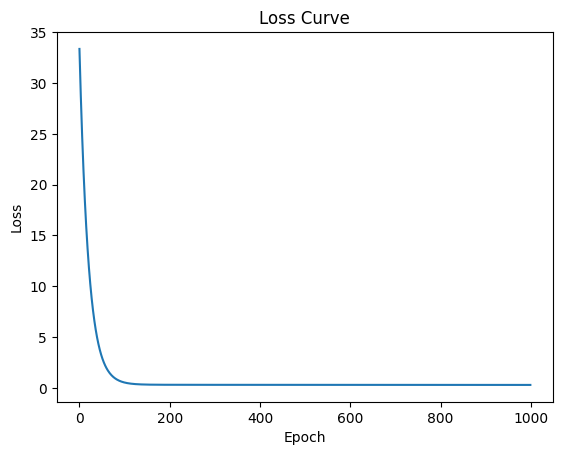

In [9]:
plt.plot(range(1000), loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

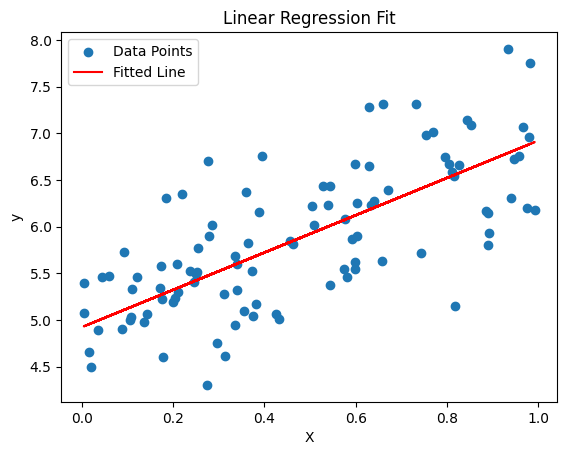

In [10]:
plt.scatter(X, y, label="Data Points")
plt.plot(X, X_bias @ w_optimal, color="red", label="Fitted Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()


## 7. Experimenting with the Learning Rate

I tested different learning rates (α) from the range: { 10e−6 , 10e−5 , 10e−4 , 10e−3 , 10e−2 , 10e−1 } and for each value:
- plotted the loss curve (loss vs epoch)
- recorded the final weights and loss
- observed how the model converged (or not)

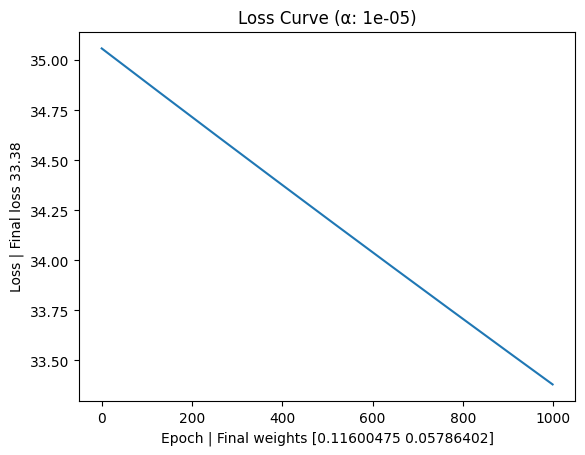

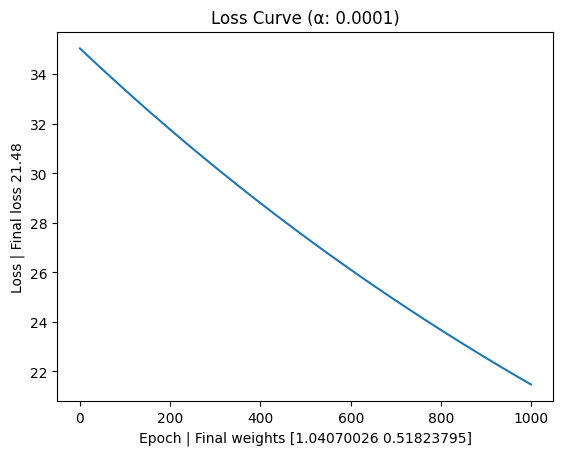

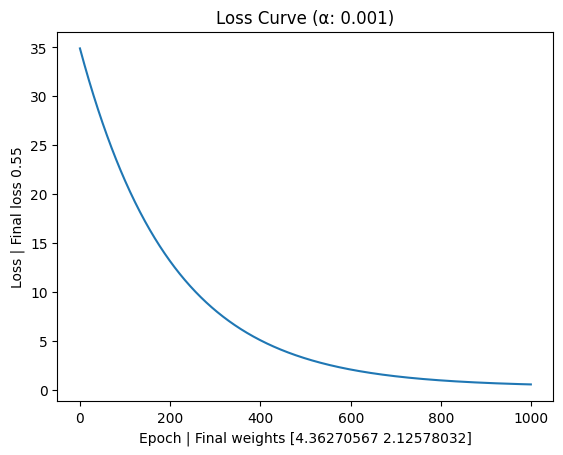

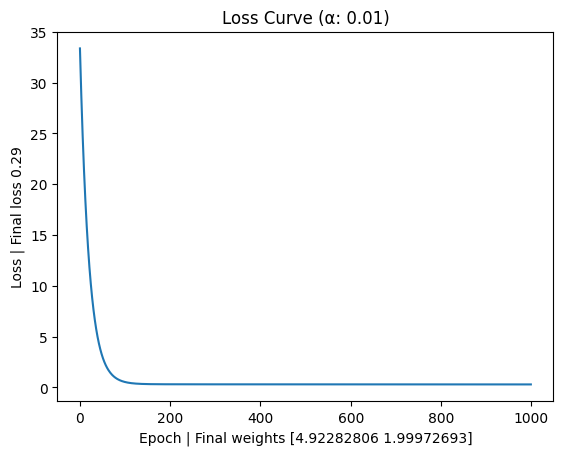

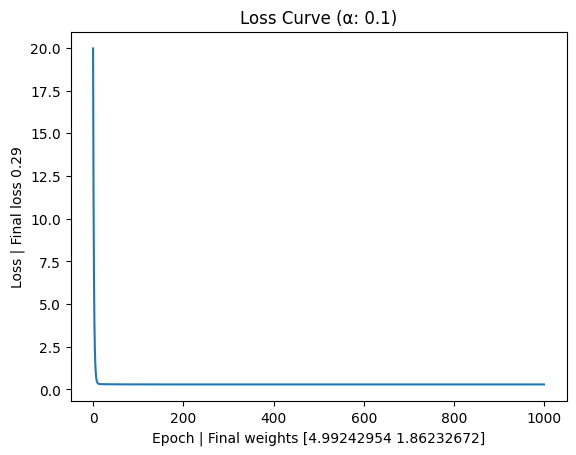

/Users/nicolas/studia/I_sem/MSUM/laby/Stochastic-Methods-in-Machine-Learning/.venv/lib/python3.13/site-packages/numpy/_core/_methods.py:135: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/var/folders/8j/_nnvcqj93gvgk18wygygd9tw0000gn/T/ipykernel_27345/2137272381.py:3: RuntimeWarning: overflow encountered in square
  loss = np.mean(((y_pred - y) ** 2))


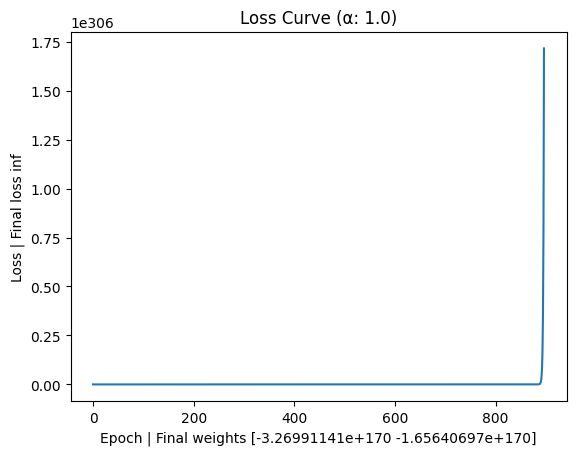

In [11]:
learning_rates = [10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1]
for learning_rate in learning_rates:
    w_optimal, loss_history, w_history = gradient_descent(X_bias, y, learning_rate)
    plt.plot(range(1000), loss_history)
    plt.xlabel(f"Epoch | Final weights {w_optimal}")
    plt.ylabel(f"Loss | Final loss {round(loss_history[-1],2)}")
    plt.title(f"Loss Curve (α: {learning_rate})")
    plt.show()

Generally, the less the learning rate the more iterations it took for the gradient to converge. <br>
For learning rates of 10e-6 and 10e-5 the gradients didn't manage to converge at all. <br>
The model with learning rate of 10e-4 was close to achieving it, however I'd say it still wasn't there, because the slope was a bit to small (4.3) and the intercept was a bit too large (2.1). <br>
For the number of 1000 epochs that I used, I'd say that the learning rate of 10e-3 was the best fit. It was closest to the real values. <br>
Learning rate of 10e-2 started to underfit the value of intercept and learning rate of 10e-1 exploded missing the minimum of the gradient

## 8. Visualizing the Loss Landscape

I created a visualization of the loss function to better understand how gradient descent navigates the optimization landscape. This involved:

- Generating a grid of weight values
- Calculating the loss at each point
- Plotting the loss function as a contour map
- Marking the initial weights, final learned weights, and the true weights on the plot

This provided insights into the shape of the objective function and how gradient descent moves toward the minimum

In [12]:
bias_range = np.linspace(0, 10, 50)
w_range = np.linspace(0, 4, 50)

In [13]:
B, W = np.meshgrid(bias_range, w_range)

In [14]:
loss_values = np.zeros(B.shape)

for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        w_test = np.array([B[i, j], W[i, j]]).reshape(2, 1)
        y_pred = np.dot(X_bias, w_test)
        loss_values[i, j] = np.mean((y_pred - y.reshape(-1, 1)) ** 2)

In [15]:
w_optimal, loss_history, w_history = gradient_descent(X_bias, y, learning_rate=0.01)

w_history = np.array(w_history)
w_sampled = w_history[::10]  

w_optimal

array([4.92282806, 1.99972693])

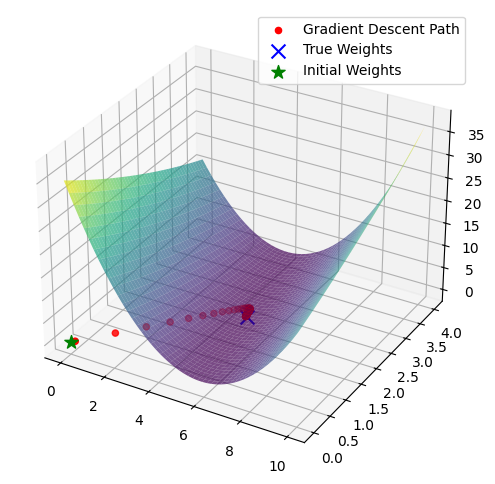

In [16]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(B, W, loss_values, cmap="viridis", alpha=0.7)
ax.scatter(
    w_sampled[:, 0], w_sampled[:, 1], c="red", marker="o", label="Gradient Descent Path"
)
ax.scatter(5, 2, c="blue", marker="x", s=100, label="True Weights")
ax.scatter(0, 0, c="green", marker="*", s=100, label="Initial Weights")
ax.legend()
plt.show()
ax.set_xlabel("Bias (b)")
ax.set_ylabel("Weight (w)")
ax.set_zlabel("Loss (MSE)")
ax.set_title("Loss Landscape for Linear Regression")

plt.show()

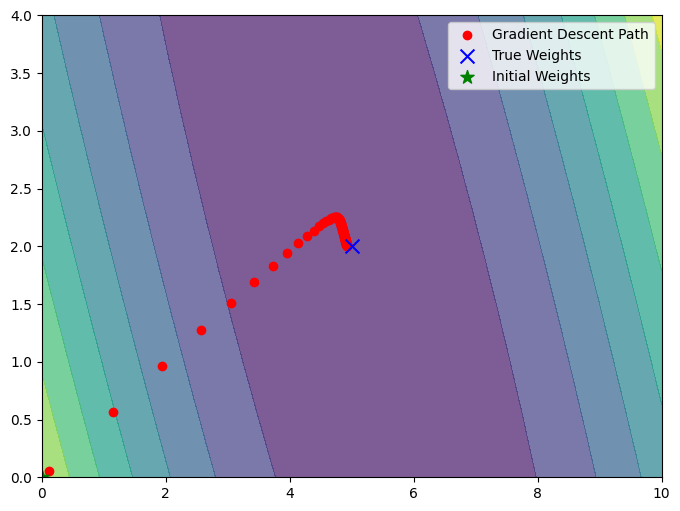

Text(0.5, 1.0, 'Loss Landscape for Linear Regression')

In [17]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.contourf(B, W, loss_values, cmap="viridis", alpha=0.7)
ax.scatter(
    w_sampled[:, 0], w_sampled[:, 1], c="red", marker="o", label="Gradient Descent Path"
)
ax.scatter(5, 2, c="blue", marker="x", s=100, label="True Weights")
ax.scatter(0, 0, c="green", marker="*", s=100, label="Initial Weights")
ax.legend()
plt.show()
ax.set_xlabel("Bias (b)")
ax.set_ylabel("Weight (w)")
ax.set_title("Loss Landscape for Linear Regression")

## 9. Analytical Solution

Computed the closed-form solution for linear regression using formula:

$$\hat{w} = (X^T X)^{-1} X^T y$$


Then compared the parameters obtained via gradient descent with those from the analytical solution and checked whether the final mean squared error (MSE) values were similar.

In [18]:
w_closed_form = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
print("Closed-form solution weights:", w_closed_form)


Closed-form solution weights: [4.99242988 1.86232606]


In [19]:
w_closed_form - w_optimal

array([ 0.06960182, -0.13740088])

As we can see, our gradient descent solution is quite close to the analytical one in both slope and intercept values

In [20]:
analytical_mse = mse(X_bias, y, w_closed_form)
gradient_mse = mse(X_bias, y, w_optimal)
analytical_mse - gradient_mse

np.float64(-0.0016013581663132381)

The MSE for analytical solution was only 0.002 smaller than our gradient descent one

## 10. Extending to a High-Dimensional Example

Extended my implementation to handle higher-dimensional data by generating a synthetic dataset with 10 features (d=10). This involved:

- creating a new true weight vector and bias
- generating a higher-dimensional feature matrix X and corresponding target y
- training the model using gradient descent

Compared the training process for 10 features against the 1D case by examining:
- whether more epochs were needed for convergence
- how the learning rate affected training in higher dimensions
- the final loss and accuracy of the model

In [21]:
X = np.random.rand(100,10) * 10
true_w = np.array([5] + [2] * 10)
y = np.dot(X,true_w[1:]) + true_w[0] + np.random.randn(100) *0.5
X_bias = np.c_[np.ones((100,1)), X]
w = np.random.randn(11, 1) * 0.01

In [22]:
w_optimal, loss_history, w_history = gradient_descent(X_bias, y, dim=11, learning_rate=10e-3)

/var/folders/8j/_nnvcqj93gvgk18wygygd9tw0000gn/T/ipykernel_27345/2137272381.py:3: RuntimeWarning: overflow encountered in square
  loss = np.mean(((y_pred - y) ** 2))
/var/folders/8j/_nnvcqj93gvgk18wygygd9tw0000gn/T/ipykernel_27345/1328541736.py:7: RuntimeWarning: invalid value encountered in subtract
  w -= learning_rate * gradient


Text(0, 0.5, 'Loss')

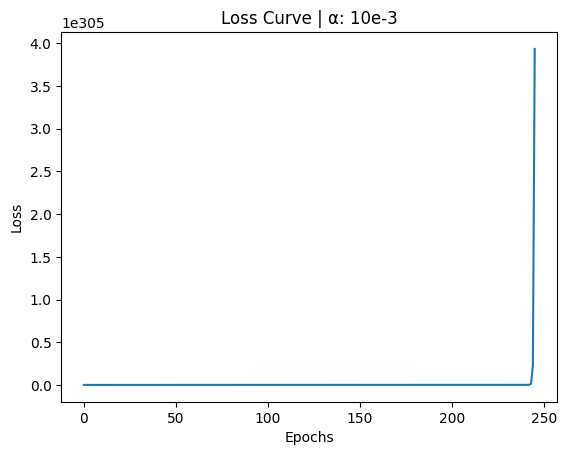

In [23]:
plt.plot(loss_history)
plt.title("Loss Curve | α: 10e-3")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Well, it looks like the gradient descent's learning rate is far more sensitive for higher dimensional data than when looking for optimal values in data with just 1 feature. <br>
The learning rate of 10e-3, which was the ideal one for 1D, now did not manage to converge and actually exploded, meaning that at some point the model overlook optimal values

In [24]:
w_optimal, loss_history, w_history = gradient_descent(X_bias, y, dim=11, learning_rate=10e-6)

Text(0, 0.5, 'Loss')

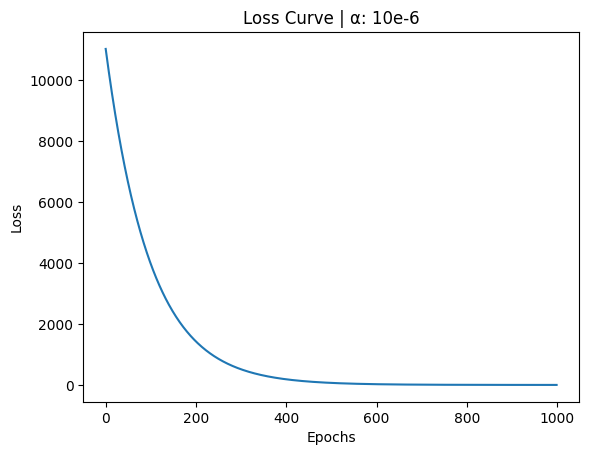

In [25]:
plt.plot(loss_history)
plt.title(f"Loss Curve | α: 10e-6")
plt.xlabel("Epochs")
plt.ylabel("Loss")

The optimal learning rate right now looks to be 10e-6

In [26]:
print(f"Final loss: {loss_history[-1]} | Optimal weights: {w_optimal}")

Final loss: 2.135865601894893 | Optimal weights: [0.40653128 2.14892682 2.20192903 2.22359001 2.01510443 2.20154749
 1.90687809 1.97641633 2.08742716 1.92020871 2.0250274 ]


Final loss is greater in high dimensional data for sure. <br>
Also, the gradient seems to ignore the intercept value. The divergence here is the highest (5 - 0.4 = 4.6)

So I tried to decrease the learning rate and increase the number of epochs

In [27]:
w_optimal, loss_history, w_history = gradient_descent(X_bias, y, dim=11, learning_rate=10e-8, epochs=100000)

Text(0, 0.5, 'Loss')

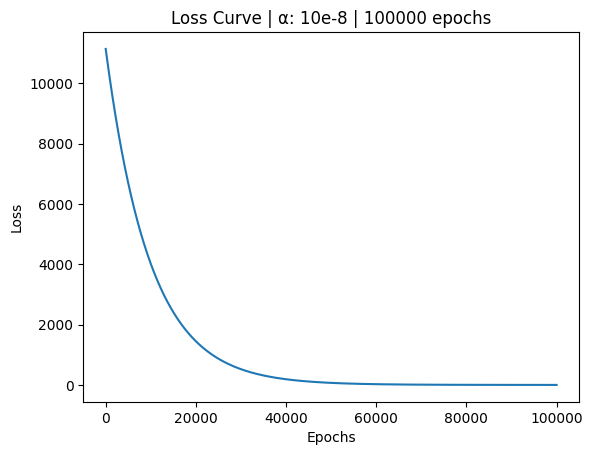

In [28]:
plt.plot(loss_history)
plt.title("Loss Curve | α: 10e-8 | 100000 epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [29]:
print(f"Final loss: {loss_history[-1]} | Optimal weights: {w_optimal}")

Final loss: 2.146432903288866 | Optimal weights: [0.40649953 2.14875788 2.20175575 2.22341491 2.01494605 2.20137423
 1.90672824 1.97626129 2.08726251 1.92005729 2.02486832]


There wasn't much effect. The final loss was about 30% lower, however the intercept value was even more deprecated

## 11. Visualize how well the high dimensional model fits the data

I did not have an idea of how to visualize this type of data <br>
I thought about 2 ways:
- show residuals for equation with the found weights
- use PCA to reduce dimensionality to 2D

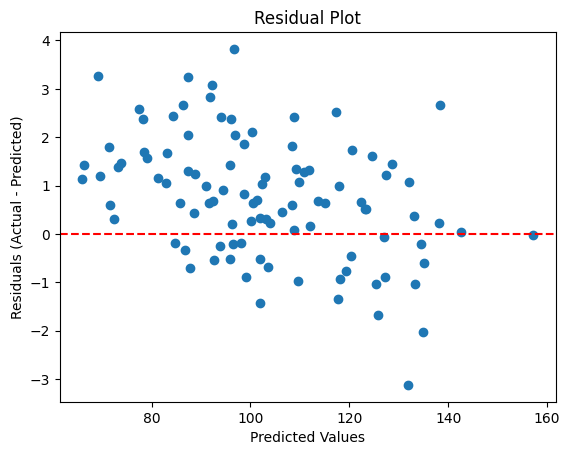

In [30]:
y_pred = X_bias @ w_optimal
residuals = y - y_pred 

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

- The residuals are scattered randomly around zero, which is a good sign.
- There’s no clear pattern or trend in the residuals <br>

The model seems to fit the data reasonably well 


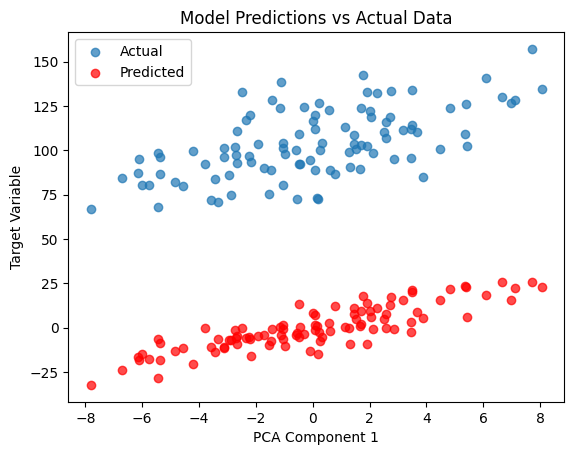

In [31]:
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_bias)

w_optimal, loss_history, w_history = gradient_descent(X_2D, y)

plt.scatter(X_2D[:, 0], y, label="Actual", alpha=0.7)
plt.scatter(X_2D[:, 0], X_2D @ w_optimal, label="Predicted", alpha=0.7, color="red")

plt.xlabel("PCA Component 1")
plt.ylabel("Target Variable")
plt.title("Model Predictions vs Actual Data")
plt.legend()
plt.show()

In [32]:
pca.explained_variance_ratio_

array([0.14776084, 0.1412593 ])

The first two principal components together explain only ~29% of the total variance in the dataset. Which makes sense, because all the 10 features had the same value. <br>
The use of PCA is no good option here and it did not make sense to do that